In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


%matplotlib inline

# from jupyter_core.paths import jupyter_data_dir
# print(jupyter_data_dir())

In [2]:
# df=pd.read_csv('SampleData2.CSV', index_col='Date')
df=pd.read_csv('SampleData.CSV')
df.head()

,Date,t,M
0,15-01-2010,12.0,12.0
1,15-02-2010,18.0,18.0
2,15-03-2010,22.0,22.0
3,15-04-2010,26.0,26.0
4,15-05-2010,31.0,NaN


In [3]:
# Converting the column to DateTime format
df.Date = pd.to_datetime(df.Date, format='%d-%m-%Y')
df = df.set_index('Date')
df.head()

,t,M
Date,,
2010-01-15,12.0,12.0
2010-02-15,18.0,18.0
2010-03-15,22.0,22.0
2010-04-15,26.0,26.0
2010-05-15,31.0,NaN


In [4]:
df = df.assign(missing= np.nan)
df.missing[df.M.isna()] = df.t
# df.missing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-15 to 2017-12-15
Data columns (total 3 columns):
t          96 non-null float64
M          75 non-null float64
missing    21 non-null float64
dtypes: float64(3)
memory usage: 3.0 KB


***Column M has a lot of missing values***

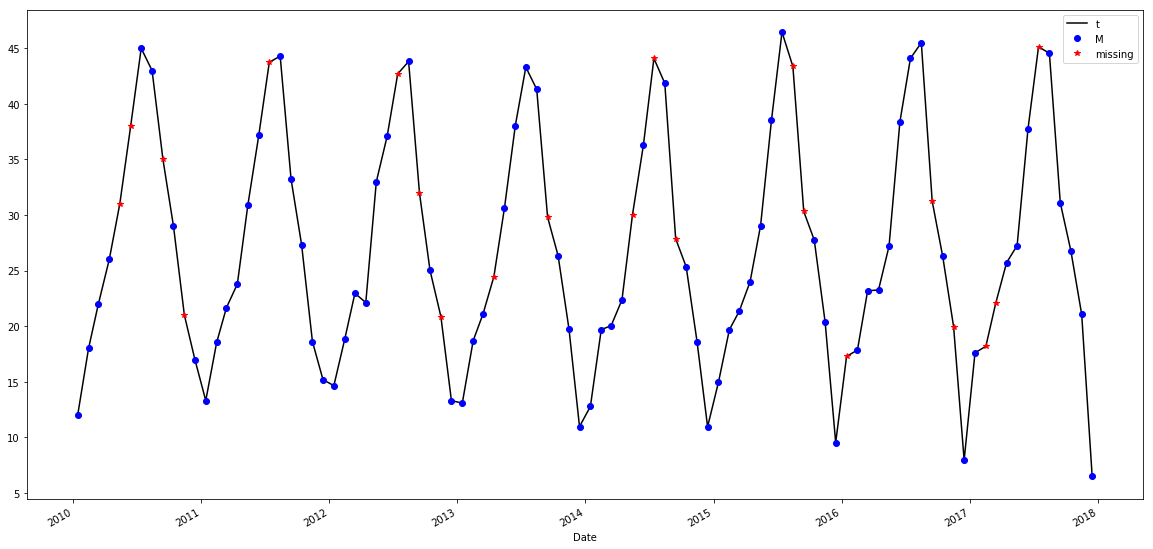

In [6]:
# plt.figure(figsize=(20,10))
# styles=['r-*', 'bs-', 'ro-', 'y^-']
styles=['k-', 'bo', 'r*', 'y^-']
df.plot(style=styles, figsize=(20,10));
# df.plot()

In [7]:
# Creating a column in the dataframe
# instead of : df['NewCol']=0, we use
df = df.assign(RollingMean=0) # To avvoid pandas warning
df = df.assign(RollingMedian=0) # To avvoid pandas warning

In [8]:
df.head()

,t,M,missing,RollingMean,RollingMedian
Date,,,,,
2010-01-15,12.0,12.0,NaN,0,0
2010-02-15,18.0,18.0,NaN,0,0
2010-03-15,22.0,22.0,NaN,0,0
2010-04-15,26.0,26.0,NaN,0,0
2010-05-15,31.0,NaN,31.0,0,0


In [9]:
# imputing using rolling average
# df['Rolling'] = df.rolling(12).mean()['M']
df.RollingMean=df.M.fillna(df.M.rolling(24,min_periods=1,).mean())
df.RollingMedian=df.M.fillna(df.M.rolling(24,min_periods=1,).median())

In [10]:
df[df.M.isna()]

,t,M,missing,RollingMean,RollingMedian
Date,,,,,
2010-05-15,31.000000,NaN,31.000000,19.500000,20.000000
2010-06-15,38.000000,NaN,38.000000,19.500000,20.000000
2010-09-15,35.000000,NaN,35.000000,27.666667,24.000000
2010-11-15,21.000000,NaN,21.000000,27.857143,26.000000
2011-07-15,43.736826,NaN,43.736826,25.526367,22.893627
2012-07-15,42.700259,NaN,42.700259,26.085959,23.370991
2012-09-15,31.983634,NaN,31.983634,26.126719,23.370991
2012-11-15,20.864568,NaN,20.864568,25.927993,23.370991
2013-04-15,24.459104,NaN,24.459104,25.812261,22.954727


In [11]:
# Creating a column in the dataframe
# instead of : df['NewCol']=0, we use
df = df.assign(InterpolateLinear=df.M) # To avvoid pandas warning
df = df.assign(InterpolateTime=df.M) # To avvoid pandas warning
df = df.assign(InterpolateQuadratic=df.M) # To avvoid pandas warning
df = df.assign(InterpolateCubic=df.M) # To avvoid pandas warning
df = df.assign(InterpolateSLinear=df.M) # To avvoid pandas warning
df = df.assign(InterpolateAkima=df.M) # To avvoid pandas warning
df = df.assign(InterpolatePoly5=df.M) # To avvoid pandas warning 
df = df.assign(InterpolatePoly7=df.M) # To avvoid pandas warning
df = df.assign(InterpolateSpline3=df.M) # To avvoid pandas warning
df = df.assign(InterpolateSpline4=df.M) # To avvoid pandas warning
df = df.assign(InterpolateSpline5=df.M) # To avvoid pandas warning

In [12]:
# Linear interpolation
df.InterpolateLinear.interpolate(method='linear', inplace=True)
# df[df.M.isna()].sample(5)

In [13]:
# Time interpolation
df.InterpolateTime.interpolate(method='time', inplace=True)
# df[df.M.isna()].sample(5)

In [14]:
# Cubic interpolation
df.InterpolateCubic.interpolate(method='cubic', inplace=True)
# df[df.M.isna()].sample(5)

In [15]:
# Quadratic interpolation
df.InterpolateQuadratic.interpolate(method='quadratic', inplace=True)
# df[df.M.isna()].sample(5)

In [16]:
# SLinear interpolation
df.InterpolateSLinear.interpolate(method='slinear', inplace=True)
# df[df.M.isna()].sample(5)

In [17]:
# Akima interpolation
df.InterpolateAkima.interpolate(method='akima', inplace=True)
# df[df.M.isna()].sample(5)

In [18]:
# Krogh interpolation
# df.InterpolateKrogh.interpolate(method='krogh', inplace=True)
# df[df.M.isna()].sample(5)

In [19]:
# Poly5 interpolation
df.InterpolatePoly5.interpolate(method='polynomial', order=5, inplace=True)
# df[df.M.isna()].sample(5)

In [20]:
# Poly7 interpolation
df.InterpolatePoly7.interpolate(method='polynomial', order=7, inplace=True)
# df[df.M.isna()].sample(5)

In [21]:
# Spline3 interpolation
df.InterpolateSpline3.interpolate(method='spline', order=3, inplace=True)
# df[df.M.isna()].sample(5)

In [22]:
# Spline4 interpolation
df.InterpolateSpline4.interpolate(method='spline', order=4, inplace=True)
# df[df.M.isna()].sample(5)

In [23]:
# Spline5 interpolation
df.InterpolateSpline5.interpolate(method='spline', order=5, inplace=True)
# df[df.M.isna()].sample(5)

In [24]:
df[df.M.isna()].sample(5)

,t,M,missing,RollingMean,RollingMedian,InterpolateLinear,InterpolateTime,InterpolateQuadratic,InterpolateCubic,InterpolateSLinear,InterpolateAkima,InterpolatePoly5,InterpolatePoly7,InterpolateSpline3,InterpolateSpline4,InterpolateSpline5
Date,,,,,,,,,,,,,,,,
2016-11-15,19.950309,NaN,19.950309,26.753424,23.989000,17.107874,16.957622,12.801090,12.347818,16.957622,-1.199158e+12,11.365876,10.975808,12.977792,14.113596,11.599386
2013-04-15,24.459104,NaN,24.459104,25.812261,22.954727,25.849693,25.927584,24.912123,24.780336,25.927584,-4.631581e+11,24.302223,24.008727,25.319354,24.312093,25.975917
2012-07-15,42.700259,NaN,42.700259,26.085959,23.370991,40.461686,40.406710,42.003812,41.860300,40.406710,2.038320e+12,40.393766,38.683303,42.677832,43.519872,44.431515
2017-03-15,22.063382,NaN,22.063382,27.466943,26.273242,23.012763,22.922618,25.369683,26.223263,22.922618,6.741612e+11,28.328538,28.839413,24.443906,33.809615,27.109003
2010-05-15,31.000000,NaN,31.000000,19.500000,20.000000,32.333333,32.263736,32.500323,32.891644,32.263736,5.560619e+12,32.530273,32.278793,33.432723,34.904181,34.330338


In [25]:
df.RollingMean.corr(df.InterpolateLinear)

0.8795393487452928

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-15 to 2017-12-15
Data columns (total 16 columns):
t                       96 non-null float64
M                       75 non-null float64
missing                 21 non-null float64
RollingMean             96 non-null float64
RollingMedian           96 non-null float64
InterpolateLinear       96 non-null float64
InterpolateTime         96 non-null float64
InterpolateQuadratic    96 non-null float64
InterpolateCubic        96 non-null float64
InterpolateSLinear      96 non-null float64
InterpolateAkima        96 non-null float64
InterpolatePoly5        96 non-null float64
InterpolatePoly7        96 non-null float64
InterpolateSpline3      96 non-null float64
InterpolateSpline4      96 non-null float64
InterpolateSpline5      96 non-null float64
dtypes: float64(16)
memory usage: 12.8 KB


In [27]:
r2_score(df.RollingMean, df.t)

0.6847407706545179

In [28]:
results = [(method, r2_score(df.t, df[method])) for method in list(df)[3:]]
results_df = pd.DataFrame(np.array(results), columns=['Method', 'R_squared'])
results_df.sort_values(by='R_squared', ascending=False)

,Method,R_squared
3,InterpolateTime,0.9815664478940275
6,InterpolateSLinear,0.9815664478940275
2,InterpolateLinear,0.9813215759943529
4,InterpolateQuadratic,0.9663474396797
10,InterpolateSpline3,0.9633836918698976
5,InterpolateCubic,0.9633218181089737
8,InterpolatePoly5,0.954157955951024
12,InterpolateSpline5,0.951671359314308
9,InterpolatePoly7,0.9504371542313383
11,InterpolateSpline4,0.928463604189156


In [34]:
final_df= df[['t', 'M', 'missing', 'InterpolateTime' ]]
final_df.head()

,t,M,missing,InterpolateTime
Date,,,,
2010-01-15,12.0,12.0,NaN,12.000000
2010-02-15,18.0,18.0,NaN,18.000000
2010-03-15,22.0,22.0,NaN,22.000000
2010-04-15,26.0,26.0,NaN,26.000000
2010-05-15,31.0,NaN,31.0,32.263736


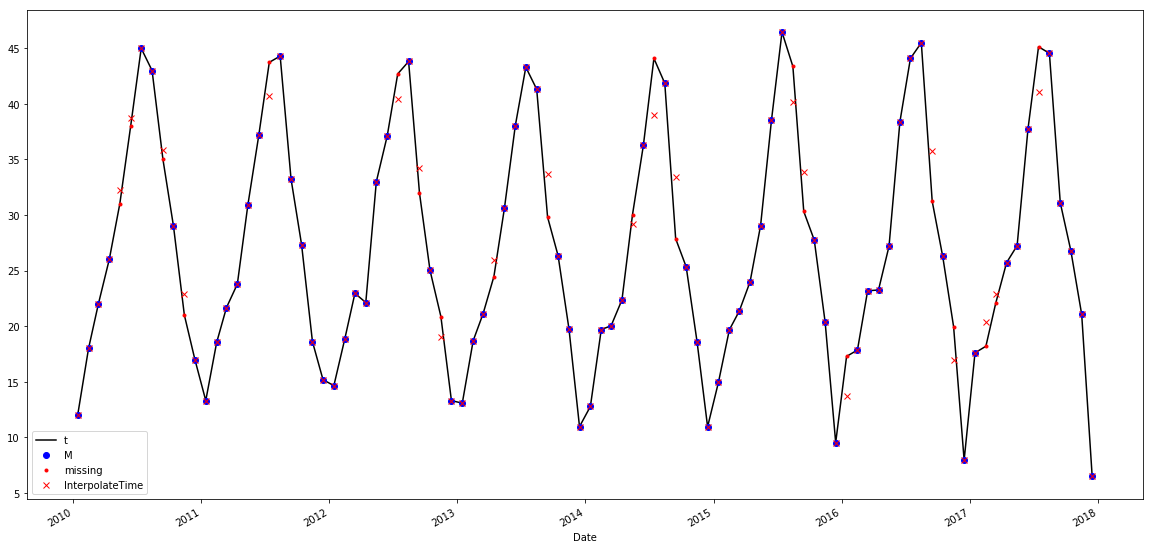

In [42]:
styles=['k-', 'bo', 'r.', 'rx']
final_df.plot(style=styles, figsize=(20,10));